# Data Analysis

#### This notebook will be used for the analysis part of the project. Here we will explore and visualise the data to get a firm grasp on what the data looks like.


In [68]:
import pandas as pd
import numpy as np
import os

In [69]:
# Read data to frame

df_organisations_raw = pd.read_csv("./data/hd2019.csv", encoding='latin1')


In [75]:
# Define data shape 

raw_org_columns = df_organisations_raw.shape[1]
raw_org_rows = df_organisations_raw.shape[0]

# Manual identification of columns that will have values 
columns_of_value = ['UNITID', 'INSTNM', 'IALIAS', 'ADDR', 'CITY', 'STABBR', 'FIPS', 'OBEREG', 'CHFNM', 'CHFTITLE', 'GENTELE', 'EIN', 'DUNS', 'OPEID', 'OPEFLAG', 'WEBADDR', 'ADMINURL', 'FAIDURL', 'APPLURL', 'NPRICURL', 'VETURL', 'ATHURL', 'DISAURL', 'SECTOR', 'ICLEVEL', 'CONTROL', 'HLOFFER', 'UGOFFER', 'GROFFER', 'HDEGOFR1', 'DEGGRANT', 'HBCU', 'HOSPITAL', 'MEDICAL', 'TRIBAL', 'LOCALE', 'OPENPUBL', 'ACT', 'NEWID', 'DEATHYR', 'CLOSEDAT', 'CYACTIVE', 'POSTSEC', 'PSEFLAG', 'PSET4FLG', 'RPTMTH', 'INSTCAT', 'C18BASIC', 'C18IPUG', 'C18IPGRD', 'C18UGPRF', 'C18ENPRF', 'C18SZSET', 'C15BASIC', 'CCBASIC', 'CARNEGIE', 'LANDGRNT', 'INSTSIZE', 'F1SYSTYP', 'F1SYSNAM', 'F1SYSCOD', 'CBSA', 'CBSATYPE', 'CSA', 'NECTA', 'COUNTYCD', 'COUNTYNM', 'CNGDSTCD']

df_organisations = df_organisations_raw[columns_of_value]


In [76]:
# Filter the dataset to remove records that arent relevant
# Remove institutions that have closed down  or removed from IPEDS using column CLOSEDAT & DEATHYR

df_organisations_filtered = df_organisations.loc[(df_organisations['DEATHYR']==-2)]

In [79]:
# Understading the data

raw_columns = df_organisations_raw.shape[1]
raw_rows = df_organisations_raw.shape[0]
org_columns = df_organisations.shape[1]
org_rows = df_organisations_raw.shape[0]
fil_org_columns = df_organisations_filtered.shape[1]
fil_org_rows = df_organisations_filtered.shape[0]
is_nulls_counts = len(df_organisations_filtered.columns[df_organisations_filtered.isnull().sum()==0])
categorical_vals = df_organisations_filtered.select_dtypes(include=['object'])
categorical_vals_columns = list(categorical_vals.columns)

print(f'The raw data has {raw_columns} columns and {raw_rows} rows')
print(f'The unfiltered reduced data has {org_columns} columns and {org_rows} rows')
print(f'The filtered organisations df has {fil_org_columns} columns and {fil_org_rows} rows')
print(f'The df has {df_organisations_filtered.shape[1]} columns with {is_nulls_counts} containing nulls')
print(f'There are {categorical_vals.shape[1]} columns with categorical values, they are in the columns: \n\n{categorical_vals_columns}')


The raw data has 73 columns and 6559 rows
The unfiltered reduced data has 68 columns and 6559 rows
The filtered organisations df has 68 columns and 6388 rows
The df has 68 columns with 67 containing nulls
There are 21 columns with categorical values, they are in the columns: 

['INSTNM', 'IALIAS', 'ADDR', 'CITY', 'STABBR', 'CHFNM', 'CHFTITLE', 'GENTELE', 'DUNS', 'WEBADDR', 'ADMINURL', 'FAIDURL', 'APPLURL', 'NPRICURL', 'VETURL', 'ATHURL', 'DISAURL', 'ACT', 'CLOSEDAT', 'F1SYSNAM', 'COUNTYNM']


## The distribution of organisations accross states
The Top 5 States with organisations: 
CA, NY, FL, PA, TX

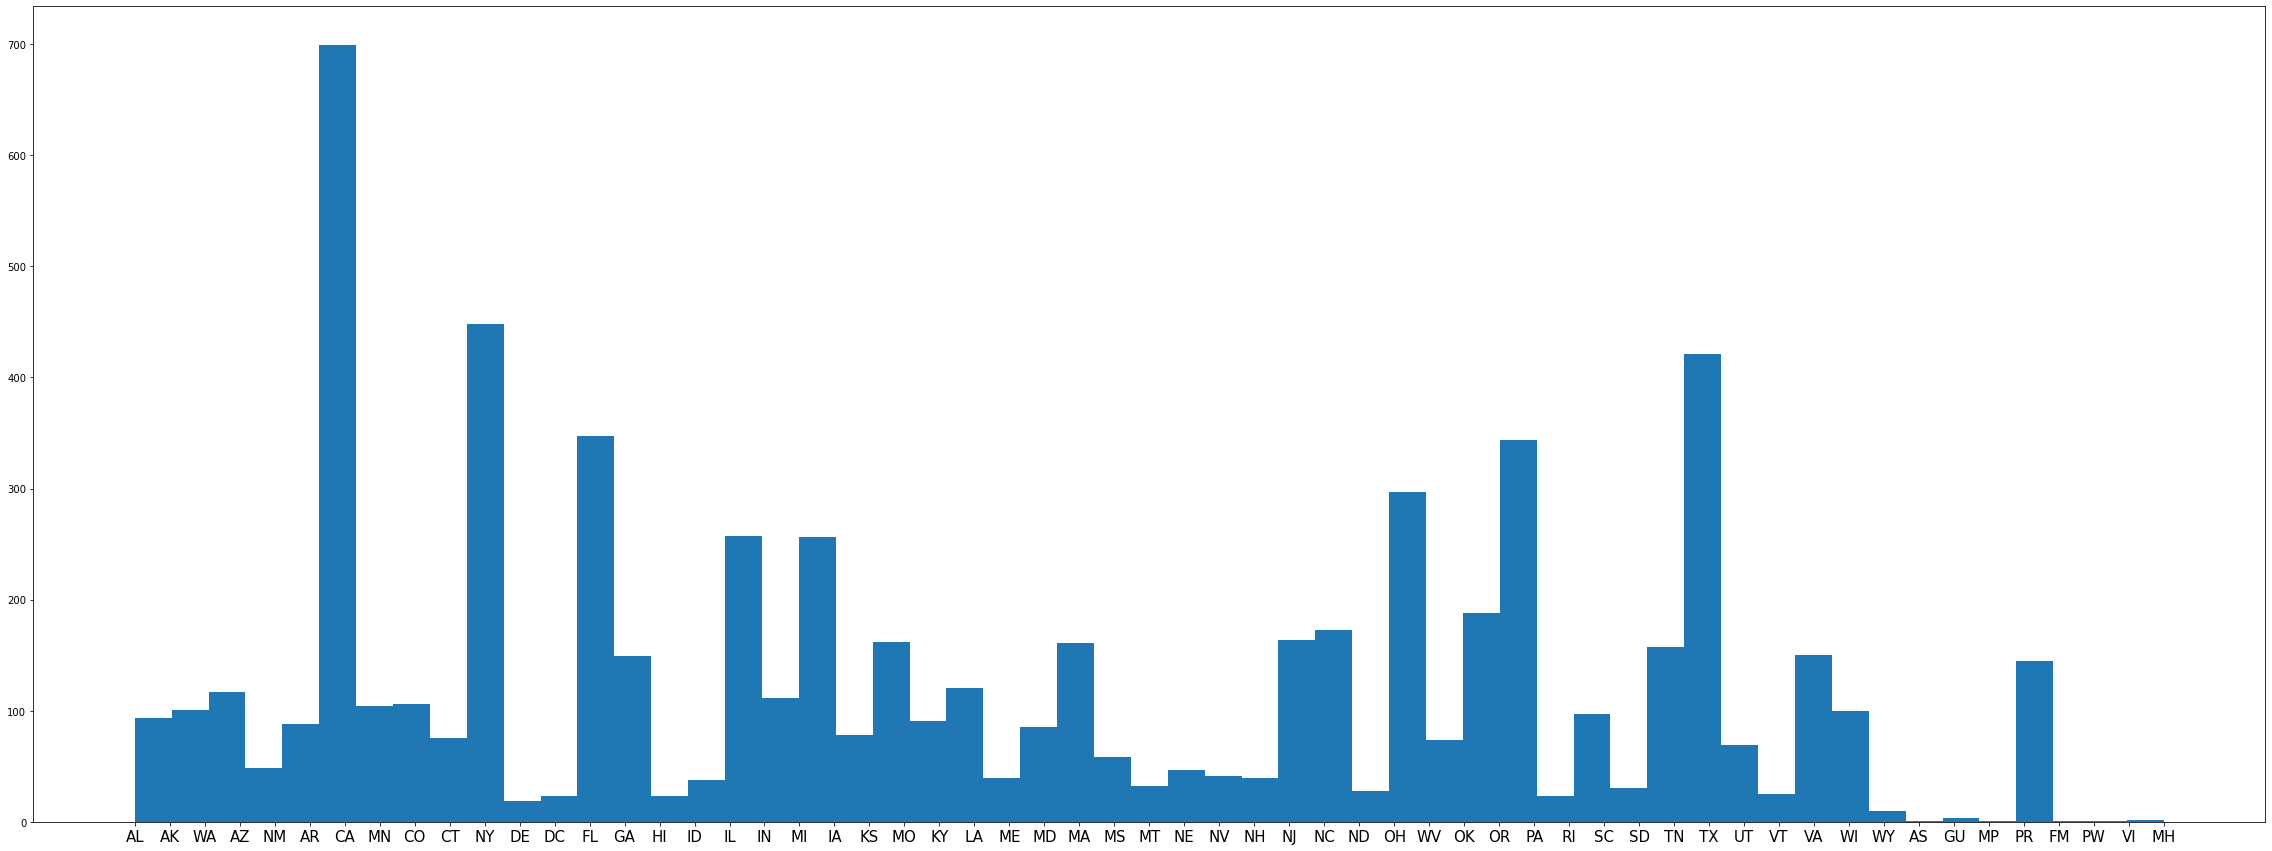

In [84]:
df_organisations_raw['STABBR'].hist(bins=55, grid=False, figsize=(40, 15), xlabelsize=15);